In [113]:
%config IPCompleter.greedy=True
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
import pandas as pd, numpy as np, os, sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import display, HTML
from IPython.core.debugger import Tracer
from IPython.core.debugger import Pdb

font = {'size'   : 18}
matplotlib.rc('font', **font)

def plotCVImage(img, is_gray=False):
    img2 = img
    if not is_gray:
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img2, cmap = 'gray')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

def plotHorizontalBars(series, xlabel, title):
    xpos = np.arange(len(series.index), 0, -1)
    plt.barh(xpos, series, align='center', alpha=0.5, color='g')
    plt.grid(axis='x')
    plt.yticks(xpos, series.index)
    plt.xlabel(xlabel)
    plt.title(title)

def plotVerticalBars(series, ylabel, title):
    xpos = np.arange(len(series.index), 0, -1)
    plt.bar(xpos, series, align='center', alpha=0.5, color='g')
    plt.grid(axis='y')
    plt.xticks(xpos, series.index)
    plt.ylabel(ylabel)
    plt.title(title)

In [115]:
import cv2

pwd = os.getcwd()
img_file = pwd+'/../irs1099misc.png'
print('image file:', img_file)

image file: /Users/hwang7/tmp/simpletest/OCR/cv_python/../irs1099misc.png


(1044, 1518, 4)
[[[255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]]]


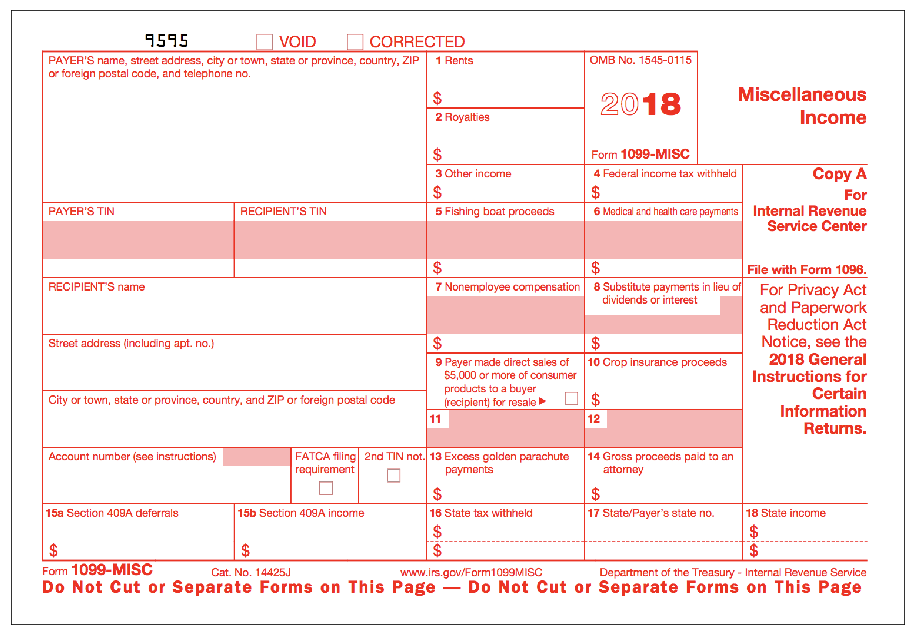

In [118]:
img = cv2.imread(img_file, cv2.IMREAD_UNCHANGED)
print(img.shape) # 0 - rows (vertical axis), 1 - columns (horizontal axis), 2 - BGR colors
print(img[0:2, 0:2, :])
plt.figure(figsize=(16,12))
plotCVImage(img)

In [120]:
ximg = np.matrix.copy(img)

# get a slice at the top-left corner
x1,y1=50,65
x2,y2=55,150
cv2.rectangle(ximg,(x1,y1),(x2,y2),(255,0,0),1) # (x,y), (x,y) (b,g,r) thickness
ximg2 = ximg[y1:y2, x1:x2, :] # this is the slice

plt.figure(figsize=(4,3))
plotCVImage(ximg2)

In [ ]:
%%time
for i in range(3):
    b = np.matrix.flatten(img[:, :, i])
    print(b.shape)
    cnts = np.unique(b, return_counts=True)

    plt.figure(figsize=(16,6))
    plt.plot(cnts[0], cnts[1], marker='^')
    plt.xlabel('color')
    plt.ylabel('freq')
    plt.grid(True, which='major', axis='both')
    plt.tight_layout()

In [ ]:
ximg = np.matrix.copy(img)
threshold = 200
a = ximg[:, :, 0]; fb = a <= threshold; a[fb] = 0
a = ximg[:, :, 1]; fg = a <= threshold; a[fg] = 0
fr = fb | fg

r_thresh = 200
a = ximg[:, :, 2]
#a[fr] = 255
a[a >= r_thresh] = 255; a[a < r_thresh] = 0

plt.figure(figsize=(16,12))
plotCVImage(ximg)

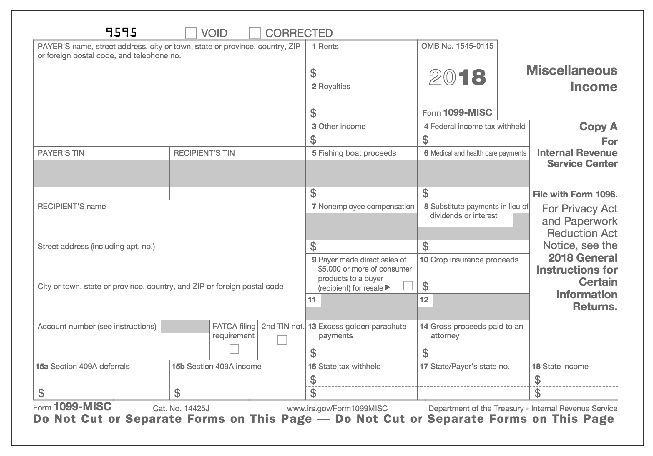

In [125]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12,8))
plotCVImage(gray_img, is_gray=True)

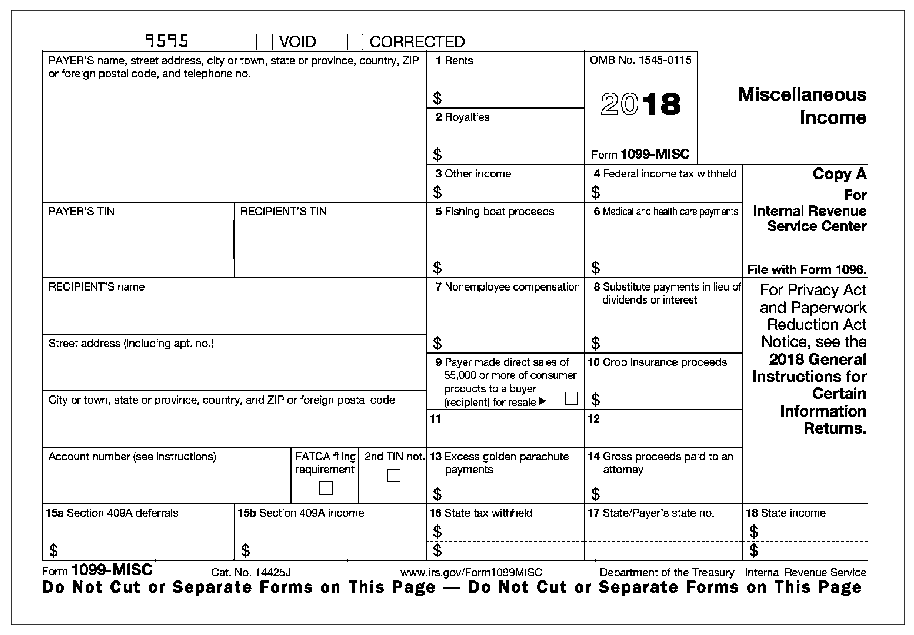

In [128]:
thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
#thresh_img = cv2.threshold(gray_img, 190, 255, cv2.THRESH_BINARY)[1]
plt.figure(figsize=(16,12))
plotCVImage(thresh_img, is_gray=True)

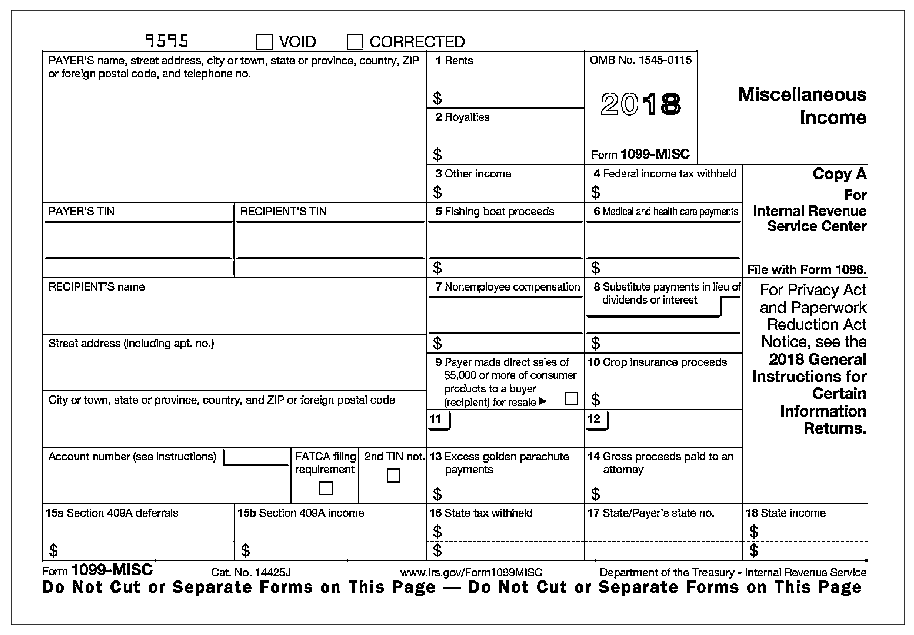

In [129]:
thresh_img_2 = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.figure(figsize=(16,12)); plotCVImage(thresh_img_2, is_gray=True)

In [136]:
ximg = cv2.GaussianBlur(thresh_img, (5,5), 0)
#plt.figure(figsize=(16,12)); plotCVImage(ximg, is_gray=True)

thresh_out_file = os.environ['HOME'] + '/tmp/thresh_img.png'
cv2.imwrite(thresh_out_file, thresh_img)

thresh_out_file_2 = os.environ['HOME'] + '/tmp/thresh_img_2.png'
cv2.imwrite(thresh_out_file_2, thresh_img_2)

thresh_blur_out_file = os.environ['HOME'] + '/tmp/thresh_blur_img.png'
cv2.imwrite(thresh_blur_out_file, ximg)

True

In [137]:
import pytesseract
from PIL import Image

# Gaussian-blurred image gives garbage text. Original image did not work well, either.
# Only this thresholded image works very well!
text = pytesseract.image_to_string(Image.open(thresh_out_file))
print(text)

‘lS‘lE

 

 

VOID

 

 

 

 

CORRECTED

 

 

 

PAYER'S name. street address. city or town, sta‘e or province. country, ZIP
or foreign pos1a| code. and telephone no‘

 

 

 

1 Rents 0MB No.154570115
$ g© 1 8 Miscellaneous
2 Royames Income
$ Form 1099-MISC
3 Other income 4 Federm income tax withheId Copy A
$ $ For

 

PAYER'S TIN

 

RECIPIENT’S TIN

5 Fishing boat proceeds

$

6 Medical and health care payments

$

Internal Revenue
Service Center

File with Form 1096.

 

RECIPIENT’S name

 

Street address (including apt no‘)

7 Nonemployee compensation

$

8 Substitute payments in Heu of

dividends or interest

$

For Privacy Act
and Paperwork

Reduction Act
Notice, see the

 

 

City or town. state or province. country. and ZIP or foreign posta‘ code

 

 

 

 

 

9 Payer made direct sa‘es of 1D Crop insurance proceeds 201 8 General
$5,000 or more of consumer |nstructi°ns for
products to a buyer -
(recipient) for resale > $ Certain

11 12 Information
Return s.

 

 

 

 



In [138]:
# looks like adaptive thresholding is better than binary + OTSU
text_2 = pytesseract.image_to_string(Image.open(thresh_out_file_2))
print(text_2)

"15:15

 

 

VOID

 

 

 

 

CORRECTED

 

 

 

PAYER’S name, street address, city or town, state or province, country, ZIP
or foreign postal code, and telephone no.

 

 

 

1 Rents OMB No. 1545-0115
3; Miscellaneous
2 Royalties 2 © 1] 8 Income
$ Form 1099-MISC
3 Other income 4 Federal income tax withheld Copy A
$ $ For

 

PAYER’S TIN

RECIPIENT’S TIN

5 Fishing boat proceeds

$

6 Medical and health cam paymems

$

Internal Revenue
Service Center

File with Form 1096.

 

RECIPIENT’S name

7 Nonemployea compensation

 

Street address Gncluding apt. no.)

$

8 Substitute payments in Men of FOI’ Privacy Act

dividends or interest '—

$

and Paperwork
Reduction Act
Notice, see the

 

9 Payer made direct 53165 of
$5,000 or more of consumer
products to a buyer

 

City or town, state or province, country, and ZIP or foreign postal code

 

 

 

(recipIent) for resale >

 

1D Crop insurance proceeds

$

2018 General
Instructions for
Certain

 

1'

3'

Information
Returns.

 

 


In [141]:
from pytesseract import Output

text_loc = pytesseract.image_to_data(Image.open(thresh_out_file_2), lang='eng', config='--psm 3', nice=0, output_type=Output.STRING)
print(text_loc)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1518	1044	-1	
2	1	1	0	0	0	229	43	71	21	-1	
3	1	1	1	0	0	229	43	71	21	-1	
4	1	1	1	1	0	229	43	71	21	-1	
5	1	1	1	1	1	229	43	71	21	65	"15:15
2	1	2	0	0	0	417	42	183	2	-1	
3	1	2	1	0	0	417	42	183	2	-1	
4	1	2	1	1	0	417	42	183	2	-1	
5	1	2	1	1	1	417	42	183	2	95	 
2	1	3	0	0	0	571	42	29	2	-1	
3	1	3	1	0	0	571	42	29	2	-1	
4	1	3	1	1	0	571	42	29	2	-1	
5	1	3	1	1	1	571	42	29	2	95	 
2	1	4	0	0	0	456	45	62	20	-1	
3	1	4	1	0	0	456	45	62	20	-1	
4	1	4	1	1	0	456	45	62	20	-1	
5	1	4	1	1	1	456	45	62	20	94	VOID
2	1	5	0	0	0	417	42	2	28	-1	
3	1	5	1	0	0	417	42	2	28	-1	
4	1	5	1	1	0	417	42	2	28	-1	
5	1	5	1	1	1	417	42	2	28	95	 
2	1	6	0	0	0	444	42	2	28	-1	
3	1	6	1	0	0	444	42	2	28	-1	
4	1	6	1	1	0	444	42	2	28	-1	
5	1	6	1	1	1	444	42	2	28	95	 
2	1	7	0	0	0	571	42	2	28	-1	
3	1	7	1	0	0	571	42	2	28	-1	
4	1	7	1	1	0	571	42	2	28	-1	
5	1	7	1	1	1	571	42	2	28	95	 
2	1	8	0	0	0	597	42	2	28	-1	
3	1	8	1	0	0	597	42	2	28	-1	
4	1	8	1	1	0	597	42	2

In [148]:
import re
from io import StringIO

df = pd.read_csv(StringIO(text_loc), sep='\t')
print(df.head(4))
#flds = re.split('\n', text_loc)
#for i, line in enumerate(flds):
#    print(i, ':', line)

ParserError: Error tokenizing data. C error: EOF inside string starting at line 5